# Import Packages & Data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [2]:
# import csv data, defining seperators and delimeters and ensuring to remove whitespace
file_path = 'C:/Users/coopera1/OneDrive - Reed Elsevier Group ICO Reed Elsevier Inc/Documents/ICIS/Census/'

census_income_learn = pd.read_csv(file_path + 'census_income_learn.csv', header=None, 
                                  sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)
census_income_test = pd.read_csv(file_path + 'census_income_test.csv', header=None,
                                 sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)


# Exploratory Analysis

In [3]:
display(census_income_learn)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


In [4]:
display(census_income_test)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,14,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
99758,61,Private,8,36,11th grade,0,Not in universe,Separated,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
99759,24,Self-employed-not incorporated,1,43,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Agriculture,Farming forestry and fishing,...,Mexico,Mexico,Mexico,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,94,- 50000.
99760,30,Private,45,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Other professional services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.


In [5]:
# column headers pulled from metadata locally - kept descriptive headers as more clarity for analysis
# reviewed column distributions in metadata to identify which columns listed actually appear in csv's - removed those that didn't appear
column_headers = ['age', 'class of worker', 'industry code', 'occupation code', 'education', 'wage per hour',
                  'enrolled in edu inst last wk', 'marital status', 'major industry code', 'major occupation code',
                  'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment',
                  'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks',
                  'tax filer status', 'region of previous residence', 'state of previous residence',
                  'detailed household and family stat', 'detailed household summary in household', 'instance weight',
                  'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg',
                  'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 
                  'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 
                  'citizenship', 'own business or self employed', 'fill inc questionnaire for veteran\'s admin',
                  'veterans benefits', 'weeks worked in year', 'year', 'income_bound']


census_income_learn.columns = column_headers
census_income_test.columns = column_headers

# note to remember: if using classifier do not use instance weight column

In [6]:
display(census_income_learn)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income_bound
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


In [7]:
# check dtypes of learning set and testing set match
print(census_income_learn.dtypes == census_income_test.dtypes)

age                                           True
class of worker                               True
industry code                                 True
occupation code                               True
education                                     True
wage per hour                                 True
enrolled in edu inst last wk                  True
marital status                                True
major industry code                           True
major occupation code                         True
race                                          True
hispanic origin                               True
sex                                           True
member of a labor union                       True
reason for unemployment                       True
full or part time employment stat             True
capital gains                                 True
capital losses                                True
dividends from stocks                         True
tax filer status               

In [8]:
# display df info
print(census_income_learn.info())
# missing values haven't been labelled correctly in raw data so will need to replace with nulls before checking again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   industry code                               199523 non-null  int64  
 3   occupation code                             199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enrolled in edu inst last wk                199523 non-null  object 
 7   marital status                              199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

In [9]:
# some numerical columns are actually categorical (but bins are numbers) so change to correct dtypes
num_to_cat_cols = ['industry code', 'occupation code', 'own business or self employed', 'veterans benefits', 'year']
# note: I am treating year as a categorical column as it has only two possible values, it may be that I remove it entirely as it has no correlation with the target variable

# convert above columns to object columns
for col in num_to_cat_cols:
    census_income_learn[col] = census_income_learn[col].astype(object)
for col in num_to_cat_cols:
    census_income_test[col] = census_income_test[col].astype(object)

In [10]:
print(census_income_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         99762 non-null  int64  
 1   class of worker                             99762 non-null  object 
 2   industry code                               99762 non-null  object 
 3   occupation code                             99762 non-null  object 
 4   education                                   99762 non-null  object 
 5   wage per hour                               99762 non-null  int64  
 6   enrolled in edu inst last wk                99762 non-null  object 
 7   marital status                              99762 non-null  object 
 8   major industry code                         99762 non-null  object 
 9   major occupation code                       99762 non-null  object 
 10  race      

In [11]:
display(census_income_learn)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income_bound
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


In [12]:
# remove any duplicate rows
census_income_learn.drop_duplicates(inplace=True)
census_income_test.drop_duplicates(inplace=True)

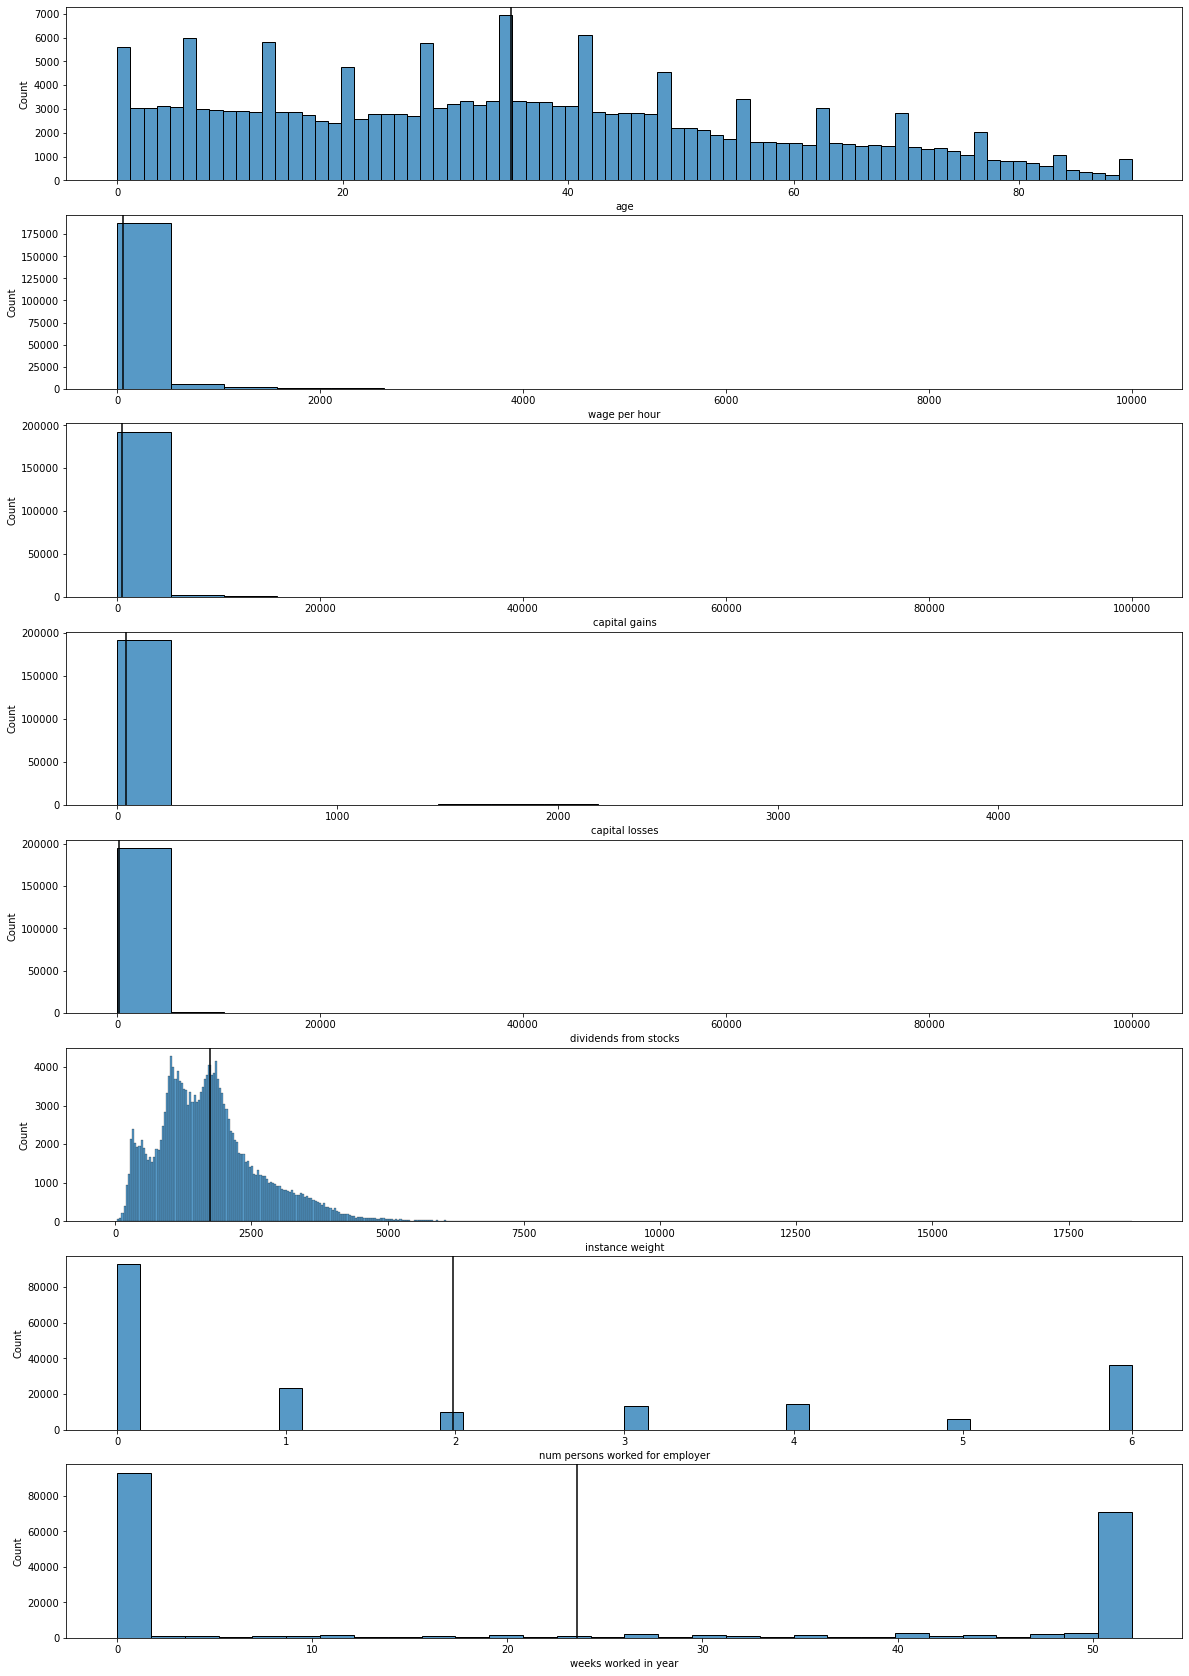

In [13]:
# select non-object features 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_learn = census_income_learn.select_dtypes(include=numerics)
numeric_test = census_income_test.select_dtypes(include=numerics)

# plot distributions of all numerical data

# number cols
n = numeric_learn.shape[1]  # Number of cols
# create subplots
fig, axes = plt.subplots(n, 1, figsize=(20, 30))
# plot histogram for each column with mean line included
for ax, col in zip(axes, numeric_learn):
    sns.histplot(numeric_learn[col], ax=ax)
    ax.axvline(numeric_learn[col].mean(), c='k')
    ax.set(xlabel=col)
    
# none are normally distributed so will need to bear this in mind before modelling

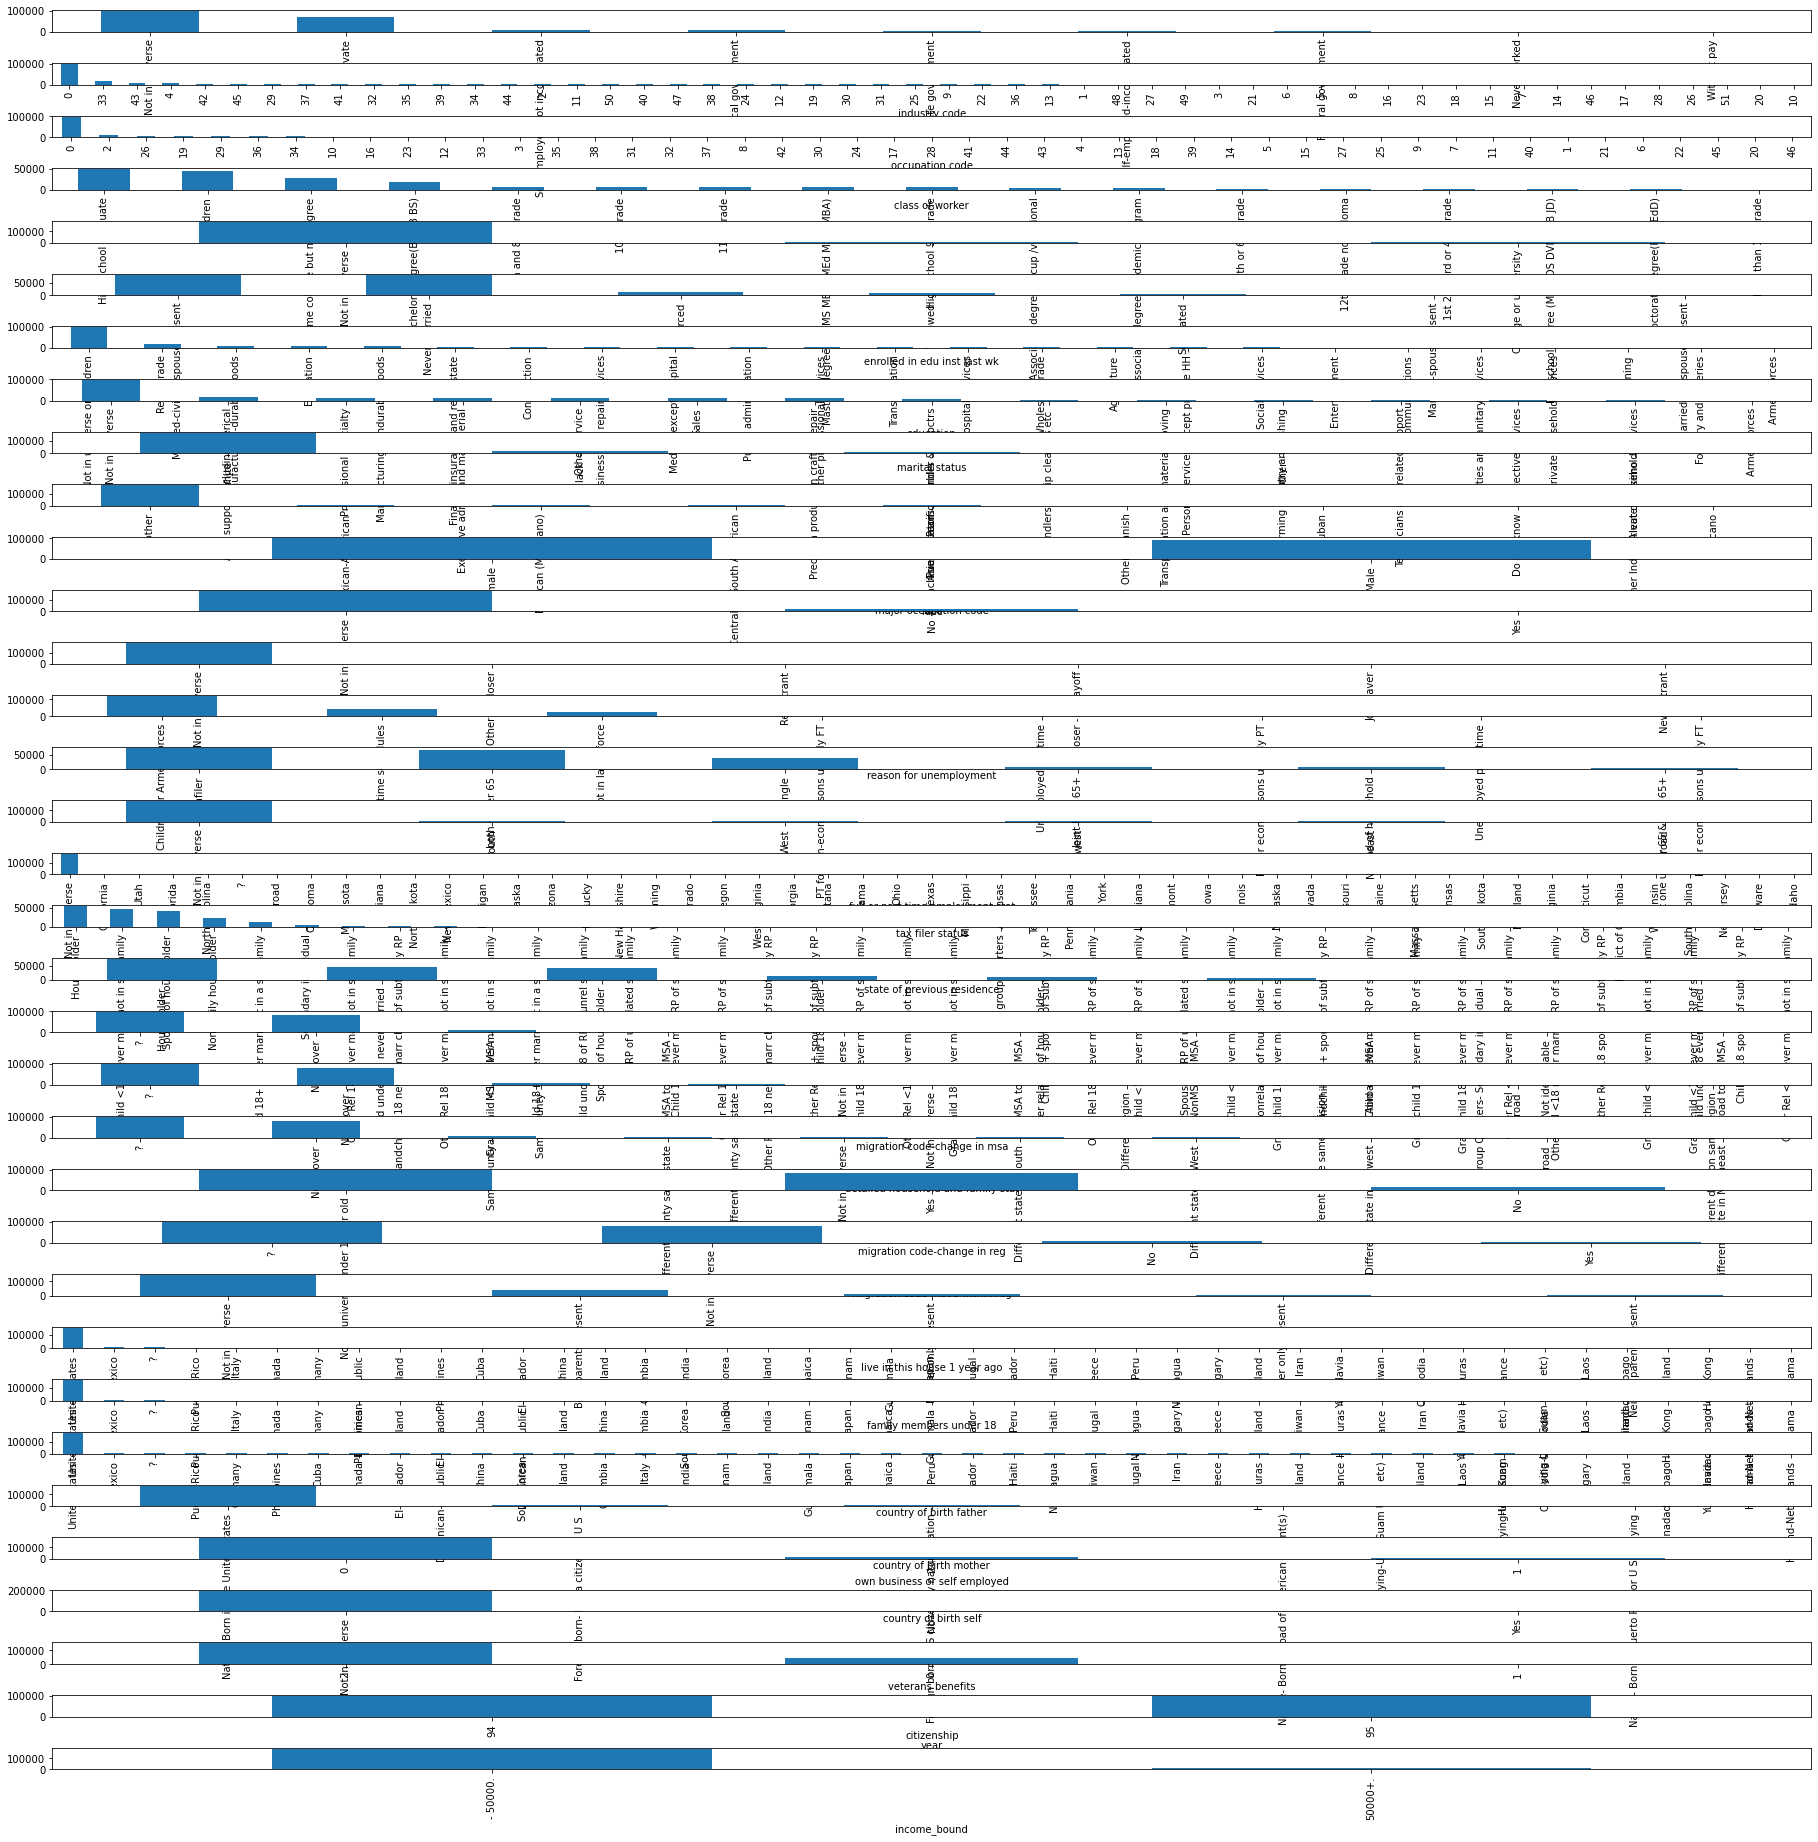

In [14]:
# select object features 
cat_cols = [c for c in census_income_learn.columns if c not in numeric_learn.columns]
cat_learn = census_income_learn[cat_cols]
cat_test = census_income_test[cat_cols]

# plot distributions of all numerical data

# number cols
n = cat_learn.shape[1]  # Number of cols
# create subplots
fig, axes = plt.subplots(n, 1, figsize=(25, 25))
fig.tight_layout(pad=1.0)
# plot histogram for each column with mean line included
for ax, col in zip(axes, cat_learn):
    cat_learn[col].value_counts().plot.bar(ax=ax)
    ax.set(xlabel=col)
    
# some variables are heavily weighted to one value so may be worth removing if model not performing well

In [15]:
# check the balance of the target variable
display(census_income_learn['income_bound'].value_counts())
# note: heavily weighted towards <50000 so bear in mind

- 50000.    183912
50000+.      12382
Name: income_bound, dtype: int64

# Data Preparation and Cleaning

In [16]:
# will remove industry/occupation code as these are a lower level of granularity to the major group codes so decided the majors will suffice
census_income_learn.drop(['industry code', 'occupation code'], axis=1, inplace=True)
census_income_test.drop(['industry code', 'occupation code'], axis=1, inplace=True)

# subset of categorical columns represented by number have 0 as a substitute for 'Not in Universe' so needs to be replaced
census_income_learn[['own business or self employed', 'veterans benefits']] = census_income_learn[['own business or self employed', 'veterans benefits']].replace([0], 'Not in universe').replace([1], '1').replace([2], '2') # Note: have done this to avoid dtype issues I was having
census_income_test[['own business or self employed', 'veterans benefits']] = census_income_test[['own business or self employed', 'veterans benefits']].replace([0], 'Not in universe').replace([1], '1').replace([2], '2')

# identify missing values and label correctly (currently labelled as "Not in universe")
census_income_learn = census_income_learn.replace(['Not in universe', 'Not in universe or children', '?'], np.NaN)
census_income_test = census_income_test.replace(['Not in universe', 'Not in universe or children', '?'], np.NaN)


In [17]:
# count nulls for each column - note that I did same for test data
display(census_income_learn.isna().sum())

age                                                0
class of worker                                97029
education                                          0
wage per hour                                      0
enrolled in edu inst last wk                  183762
marital status                                     0
major industry code                            97467
major occupation code                          97467
race                                               0
hispanic origin                                  870
sex                                                0
member of a labor union                       177232
reason for unemployment                       190226
full or part time employment stat                  0
capital gains                                      0
capital losses                                     0
dividends from stocks                              0
tax filer status                                   0
region of previous residence                  

In [18]:
# calculate % nulls for each column - note that I did same for test data
display(census_income_test.isna().mean())

age                                           0.000000
class of worker                               0.497568
education                                     0.000000
wage per hour                                 0.000000
enrolled in edu inst last wk                  0.935992
marital status                                0.000000
major industry code                           0.499631
major occupation code                         0.499631
race                                          0.000000
hispanic origin                               0.004045
sex                                           0.000000
member of a labor union                       0.904135
reason for unemployment                       0.968345
full or part time employment stat             0.000000
capital gains                                 0.000000
capital losses                                0.000000
dividends from stocks                         0.000000
tax filer status                              0.000000
region of 

In [19]:
# remove columns with at least 70% missing values as I will derive limited value from predicting income bounds with them 
census_income_learn.drop(['enrolled in edu inst last wk', 'member of a labor union', 'reason for unemployment',
                          'region of previous residence', 'state of previous residence', 'migration prev res in sunbelt',
                          'family members under 18', 'own business or self employed', 
                          'fill inc questionnaire for veteran\'s admin'], axis=1, inplace=True)
census_income_test.drop(['enrolled in edu inst last wk', 'member of a labor union', 'reason for unemployment',
                          'region of previous residence', 'state of previous residence', 'migration prev res in sunbelt',
                          'family members under 18', 'own business or self employed',
                          'fill inc questionnaire for veteran\'s admin'], axis=1, inplace=True)

In [20]:
# for columns with <5% missing data I will remove the rows that include the missing values to avoid making unneccessary assumptions
census_income_learn.dropna(axis=0, subset = ['hispanic origin', 'country of birth father', 'country of birth mother',
                                             'country of birth self'], inplace=True)
census_income_test.dropna(axis=0, subset = ['hispanic origin', 'country of birth father', 'country of birth mother',
                                            'country of birth self'], inplace=True)

In [21]:
# for the remaining missing values I will replace with the label 'Unknown' for now to test models
census_income_learn.fillna('Unknown', inplace=True)
census_income_test.fillna('Unknown', inplace=True)

In [22]:
# some field values have spaces before and after strings so I will strip those spaces out
census_income_learn_obj = census_income_learn.select_dtypes(['object'])
census_income_learn[census_income_learn_obj.columns] = census_income_learn_obj.apply(lambda x: x.str.strip())

census_income_test_obj = census_income_test.select_dtypes(['object'])
census_income_test[census_income_test_obj.columns] = census_income_test_obj.apply(lambda x: x.str.strip())

# Feature Generation

In [24]:
# will try to generate a few features based on the data we currently have to simplify the dataset
# capital net gains = capital gains - capital losses
census_income_learn['capital net gains'] = census_income_learn['capital gains'] - census_income_learn['capital losses']
census_income_test['capital net gains'] = census_income_test['capital gains'] - census_income_test['capital losses']

# level of education - there is a lot of noise in this column with a number of fields specifying which grade a person is in,
# I will simplify this to signify if a person is under 18 then group them as Children and if someone over 18 hasn't graduated then label them as such
# I will also summarise the associates degree options to a single result
def cleaning_education(age, education):
    """
    age: the age of the person in Census
    education: the person's education level
    """
    if age < 18:
        return 'Children'
    elif age > 18 and education in ('10th grade', 'Less than 1st grade', '7th and 8th grade', '12th grade no dimploma',
                                       '5th or 6th grade', '11th grade', '9th grade', '1st 2nd 3rd or 4th grade'):
        return 'Did not graduate high school'
    elif education in (' Associates degree-academic program', 'Associates degree-occup /vocational'):
        return 'Associates degree'
    else:
        return education

# similarly the married feature could be simplified to contain fewer options
def cleaning_marriage(status):
    """
    status: marriage status of person in Census
    """
    if status in ('Married-civilian spouse present','Married-spouse absent' , 'Married-A F spouse present'):
        return 'Married'
    else:
        return status
    
census_income_learn['education cleaned'] = census_income_learn.apply(lambda row: cleaning_education(row['age'],
                                                                     row['education']), axis = 1)
census_income_test['education cleaned'] = census_income_test.apply(lambda row: cleaning_education(row['age'],
                                                                     row['education']), axis = 1)
census_income_learn['marital status cleaned'] = census_income_learn.apply(lambda row: cleaning_marriage(
                                                                     row['marital status']), axis = 1)
census_income_test['marital status cleaned'] = census_income_test.apply(lambda row: cleaning_marriage(
                                                                     row['marital status']), axis = 1)



# remove the data that was used to generate features as there is a likelihood of interdependency 
census_income_learn.drop(['capital gains', 'education', 'marital status'], axis=1, inplace=True)
census_income_test.drop(['capital gains', 'education', 'marital status'], axis=1, inplace=True)


In [25]:
# encode categorical data to labels for correlation analysis
# initialise encoders
labelencoder = LabelEncoder()
# define categorical columns
categorical_columns = list(census_income_learn.select_dtypes(include=['object']))
# fit encoder to each categorical column
for col in categorical_columns:
    # learning set
    census_income_learn[col] = labelencoder.fit_transform(census_income_learn[col])
    # testing set
    census_income_test[col] = labelencoder.fit_transform(census_income_test[col])


<AxesSubplot:>

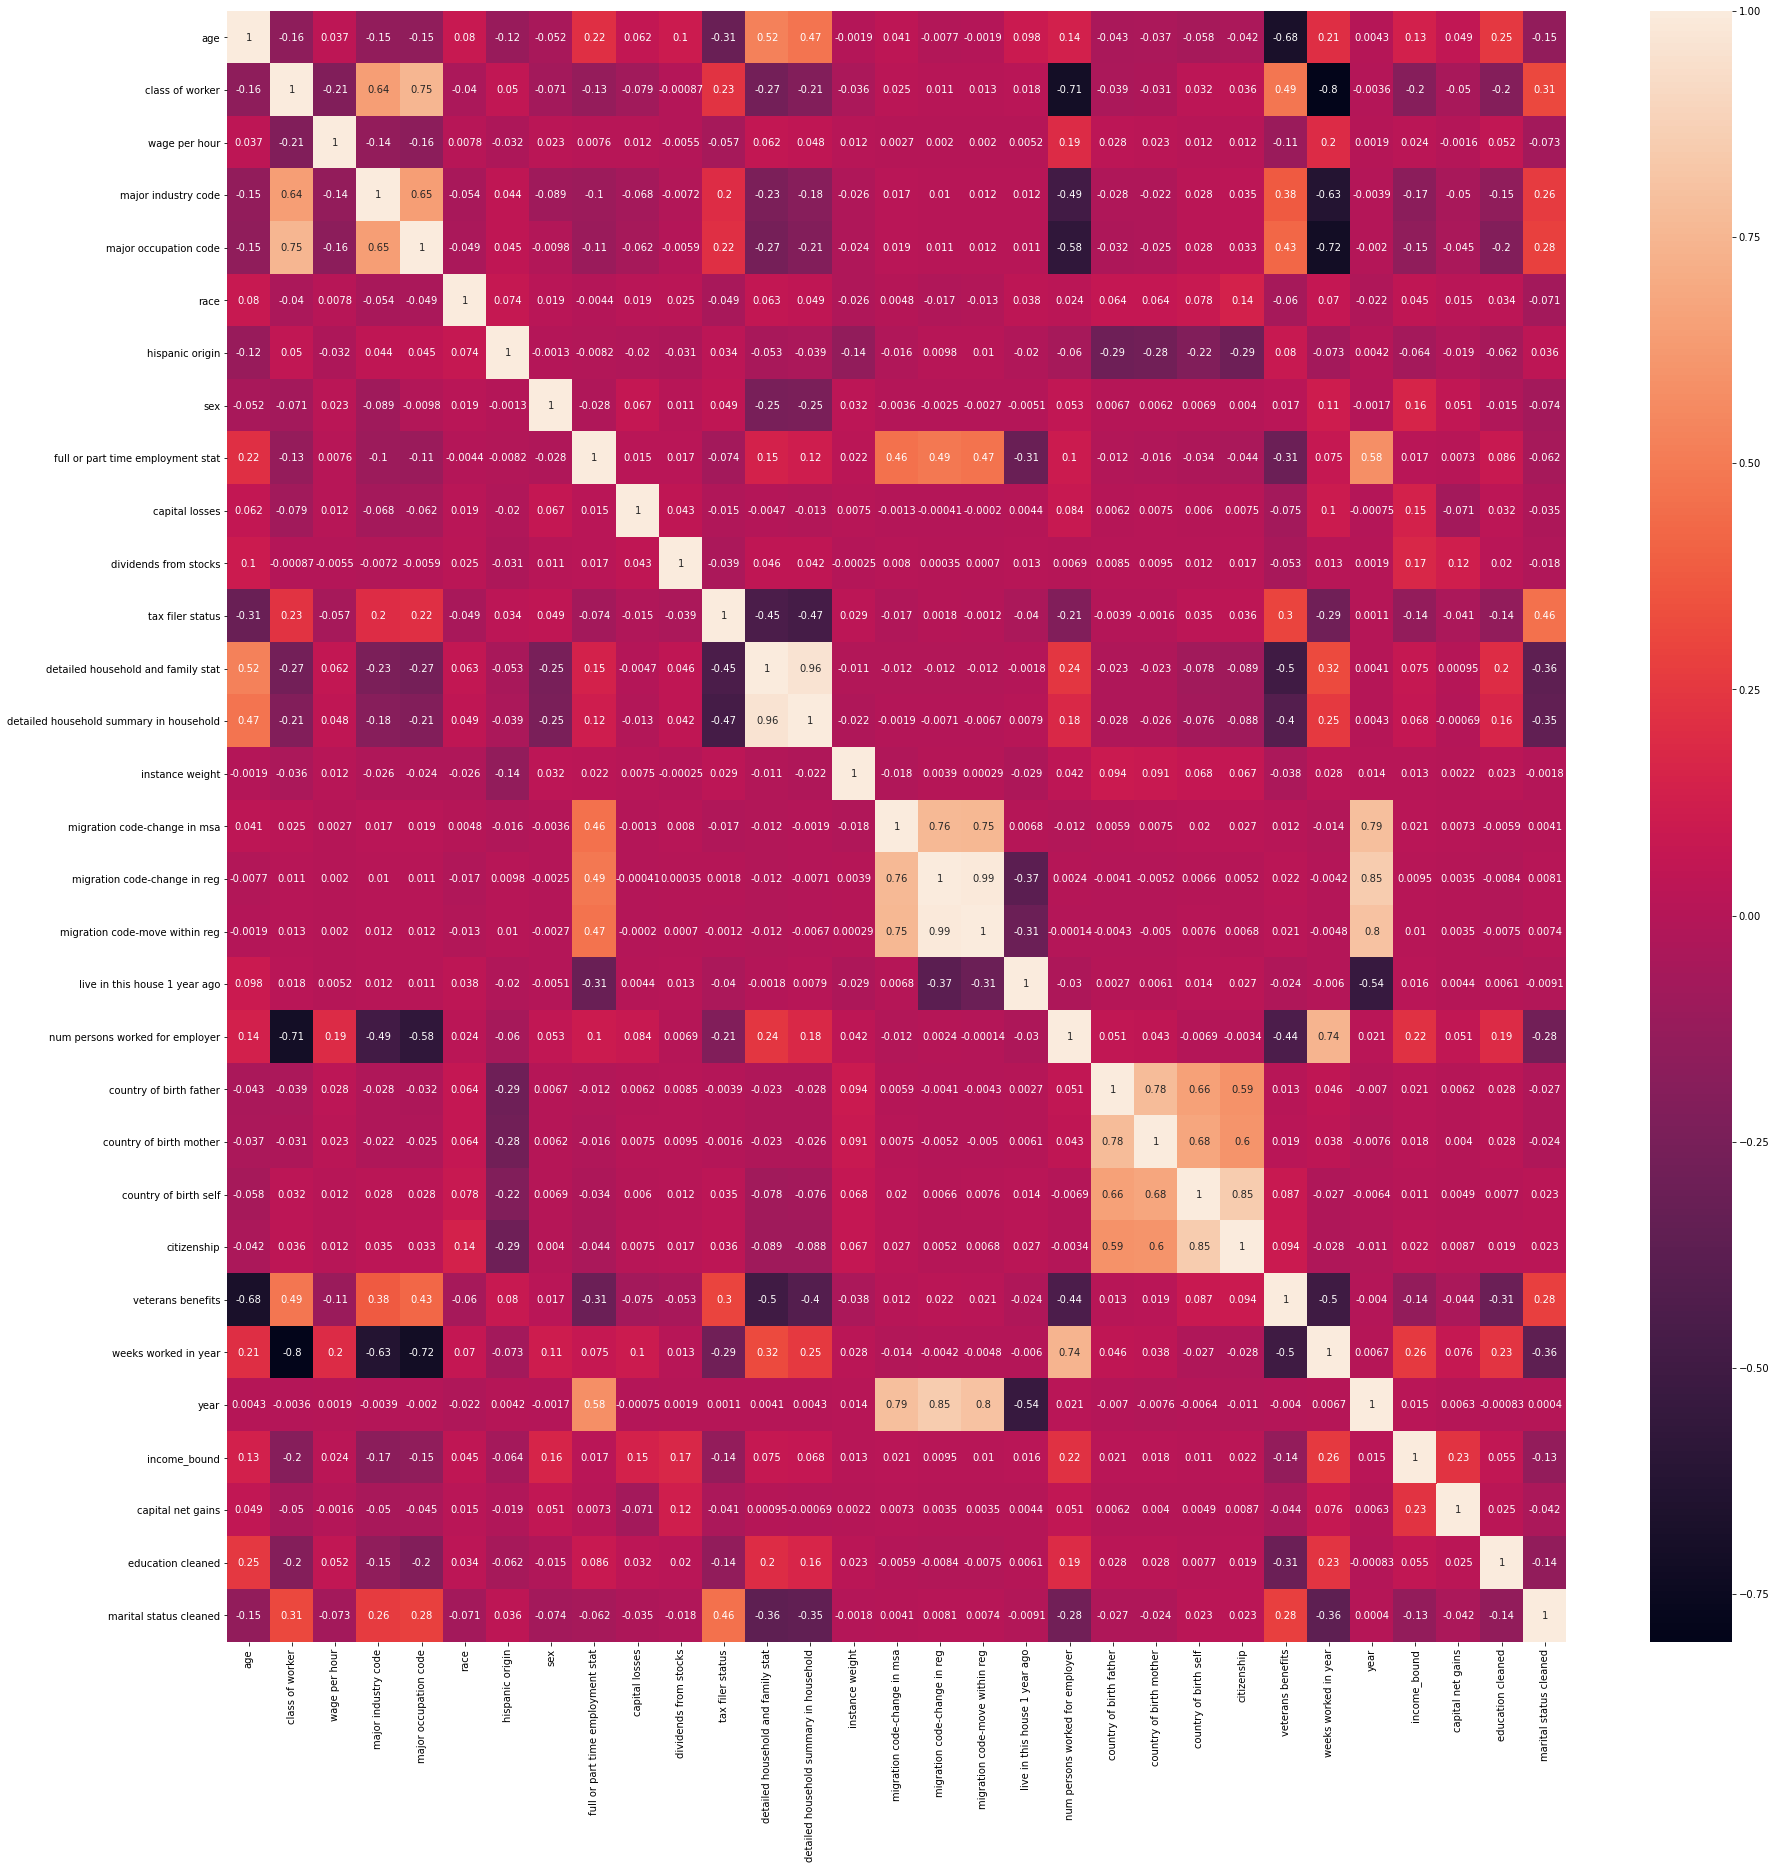

In [26]:
# check correlations among all variables including the target
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(census_income_learn.corr(), ax=ax, annot=True)


In [27]:
# migration code msa is highly correlated with migration code reg (0.99) 
# and detailed household summary in household is highly correlated with detailed household and family stat (0.96) 
# so I will remove one from each pairing as no new information will be learned by including them
census_income_learn.drop(['migration code-change in msa', 'detailed household and family stat'], axis=1, inplace=True)
census_income_test.drop(['migration code-change in msa', 'detailed household and family stat'], axis=1, inplace=True)

In [28]:
display(census_income_learn)

,age,class of worker,wage per hour,major industry code,major occupation code,race,hispanic origin,sex,full or part time employment stat,capital losses,...,country of birth mother,country of birth self,citizenship,veterans benefits,weeks worked in year,year,income_bound,capital net gains,education cleaned,marital status cleaned
0,73,7,0,21,14,4,0,0,2,0,...,39,39,4,1,0,95,0,0,13,4
1,58,5,0,4,7,4,0,1,0,0,...,39,39,4,1,52,94,0,0,17,0
2,18,7,0,21,14,1,0,0,2,0,...,40,40,0,1,0,95,0,0,0,2
3,9,7,0,21,14,4,0,0,0,0,...,39,39,4,2,0,94,0,0,10,2
4,10,7,0,21,14,4,0,0,0,0,...,39,39,4,2,0,94,0,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199517,39,3,0,5,0,3,6,1,1,0,...,25,25,0,1,52,95,0,6849,9,2
199518,87,7,0,21,14,4,0,1,2,0,...,39,39,4,1,0,95,0,0,11,1
199519,65,4,0,2,2,4,0,1,0,0,...,39,39,4,1,52,94,0,6418,11,1
199520,47,7,0,21,14,4,0,1,0,0,...,31,10,1,1,52,95,0,0,17,1


In [29]:
# final check of distributions before moving on to feature generation and modelling
display(census_income_learn.describe())

,age,class of worker,wage per hour,major industry code,major occupation code,race,hispanic origin,sex,full or part time employment stat,capital losses,...,country of birth mother,country of birth self,citizenship,veterans benefits,weeks worked in year,year,income_bound,capital net gains,education cleaned,marital status cleaned
count,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,...,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000,187190.000000
mean,34.513884,5.008969,57.117159,16.248710,9.957060,3.644297,0.708911,0.478541,0.694551,37.600262,...,35.801271,37.132913,3.664362,1.218890,23.695529,94.499989,0.062220,392.086233,11.719980,1.551755
std,21.984816,2.127917,277.477022,6.482751,4.887866,0.862682,1.937315,0.499541,1.202202,272.365735,...,8.322917,6.592913,1.050602,0.437122,24.432120,0.500001,0.241556,4652.330232,3.006432,0.847961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,-4608.000000,0.000000,0.000000
25%,16.000000,3.000000,0.000000,11.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,39.000000,39.000000,4.000000,1.000000,0.000000,94.000000,0.000000,0.000000,10.000000,1.000000
50%,33.000000,6.000000,0.000000,21.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,39.000000,39.000000,4.000000,1.000000,12.000000,94.000000,0.000000,0.000000,11.000000,1.000000
75%,49.000000,7.000000,0.000000,21.000000,14.000000,4.000000,0.000000,1.000000,1.000000,0.000000,...,39.000000,39.000000,4.000000,1.000000,52.000000,95.000000,0.000000,0.000000,13.000000,2.000000
max,90.000000,8.000000,9999.000000,23.000000,14.000000,4.000000,8.000000,1.000000,7.000000,4608.000000,...,41.000000,41.000000,4.000000,2.000000,52.000000,95.000000,1.000000,99999.000000,17.000000,4.000000


In [30]:
# I will try out 4 different classification models for testing so will remove instance weight column, as per the metadata file
census_income_learn.drop(['instance weight'], axis=1, inplace=True)
census_income_test.drop(['instance weight'], axis=1, inplace=True)


In [31]:
# define features and target variable for training and testing sets
X_train = census_income_learn.drop(['income_bound'], axis=1)
y_train = census_income_learn['income_bound']

X_test = census_income_test.drop(['income_bound'], axis=1)
y_test = census_income_test['income_bound']

# Baseline Model Testing

### K Nearest Neighbours

In [39]:
# initialise KNN model - if choosing this model may want to minimise features to reduce dimensionality

# initialise a list and dictionary of accuracy scores
acc_scores = []
acc_dict = {}
# scale data for model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# we will loop from k=1 to k=15 and choose best based on accuracy
for i in range(1,16):    
    knn_model = KNeighborsClassifier(n_neighbors=i)
    # train the model on training sets
    knn_model.fit(X_train_scaled, y_train)
    # make predictions with test set
    knn_y_pred = knn_model.predict(X_test_scaled)
    # store results
    acc_dict[i] = accuracy_score(y_test, knn_y_pred)
    acc_scores.append(accuracy_score(y_test, knn_y_pred))
    print(str(i) + ' done')

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done


Text(0, 0.5, 'Accuracy of Model')

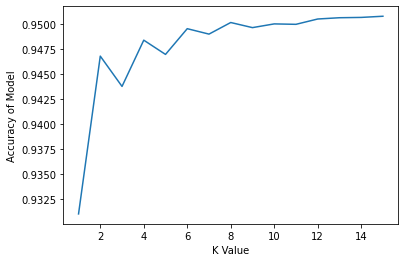

In [40]:
# plot accuracy outcomes
plt.plot(range(1,16), acc_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy of Model')
# I will choose k = 8 as best model 

In [41]:
# rerun best model and evaluate fully
knn_model = KNeighborsClassifier(n_neighbors=8, weights='uniform', algorithm='auto')
# train the model on training sets
knn_model.fit(X_train_scaled, y_train)
# make predictions with test set
knn_y_pred = knn_model.predict(X_test_scaled)

# print accuracy, precision and recall of KNN model
print("Accuracy: " + str(accuracy_score(y_test, knn_y_pred)))
print("Precision: " + str(precision_score(y_test, knn_y_pred)))
print("Recall: " + str(recall_score(y_test, knn_y_pred)))

# print AUC/ROC
print("AUC: " + str(roc_auc_score(y_test, knn_y_pred)))

# display confusion matrix
print(confusion_matrix(y_test, knn_y_pred))

Accuracy: 0.950121460925649
Precision: 0.6804157193894121
Recall: 0.36039910545329434
AUC: 0.6746374653611773
[[87472   984]
 [ 3718  2095]]


### Decision Tree Classifier

In [32]:
# initialise Decision Tree classifer
dt_model = DecisionTreeClassifier()
# train the model on training sets
dt_model.fit(X_train,y_train)
# make predictions with test set
dt_y_pred = dt_model.predict(X_test)

# print accuracy, precision and recall of DT model
print("Accuracy: " + str(accuracy_score(y_test, dt_y_pred)))
print("Precision: " + str(precision_score(y_test, dt_y_pred)))
print("Recall: " + str(recall_score(y_test, dt_y_pred)))

# print AUC/ROC
print("AUC: " + str(roc_auc_score(y_test, dt_y_pred)))

# display confusion matrix
print(confusion_matrix(y_test, dt_y_pred))

Accuracy: 0.9307619684095514
Precision: 0.4424935567010309
Recall: 0.4725615000860141
AUC: 0.7167173512910853
[[84995  3461]
 [ 3066  2747]]


### Random Forest Classifier

In [33]:
# initialise Random Forest classifer
rf_model = RandomForestClassifier(n_estimators=100)
# train the model on training sets
rf_model.fit(X_train,y_train)
# make predictions with test set
rf_y_pred = rf_model.predict(X_test)

# print accuracy, precision and recall of RF model
print("Accuracy: " + str(accuracy_score(y_test, rf_y_pred)))
print("Precision: " + str(precision_score(y_test, rf_y_pred)))
print("Recall: " + str(recall_score(y_test, rf_y_pred)))

# print AUC/ROC
print("AUC: " + str(roc_auc_score(y_test, rf_y_pred)))

# display confusion matrix
print(confusion_matrix(y_test, rf_y_pred))

Accuracy: 0.9541100467810203
Precision: 0.7132205334098078
Recall: 0.4278341648030277
AUC: 0.7082645545910771
[[87456  1000]
 [ 3326  2487]]


### Gradient Boosted Tree Classifier

In [34]:
# initialise GBT classifer
gbt_model = GradientBoostingClassifier()
# train the model on training sets
gbt_model.fit(X_train,y_train)
# make predictions with test set
gbt_y_pred = gbt_model.predict(X_test)

# print accuracy, precision and recall of GBT model
print("Accuracy: " + str(accuracy_score(y_test, gbt_y_pred)))
print("Precision: " + str(precision_score(y_test, gbt_y_pred)))
print("Recall: " + str(recall_score(y_test, gbt_y_pred)))

# print AUC/ROC
print("AUC: " + str(roc_auc_score(y_test, gbt_y_pred)))

# display confusion matrix
print(confusion_matrix(y_test, gbt_y_pred))

Accuracy: 0.9534417464914234
Precision: 0.7373333333333333
Recall: 0.3805264063306382
AUC: 0.6858090112506949
[[87668   788]
 [ 3601  2212]]


# Define Best Model

capital net gains                          0.306468
dividends from stocks                      0.170521
weeks worked in year                       0.131886
sex                                        0.107260
major occupation code                      0.081360
education cleaned                          0.061794
age                                        0.049285
capital losses                             0.029411
num persons worked for employer            0.018664
major industry code                        0.016389
tax filer status                           0.010343
wage per hour                              0.008591
class of worker                            0.004057
marital status cleaned                     0.001426
detailed household summary in household    0.000871
hispanic origin                            0.000847
veterans benefits                          0.000314
country of birth mother                    0.000198
citizenship                                0.000136
full or part

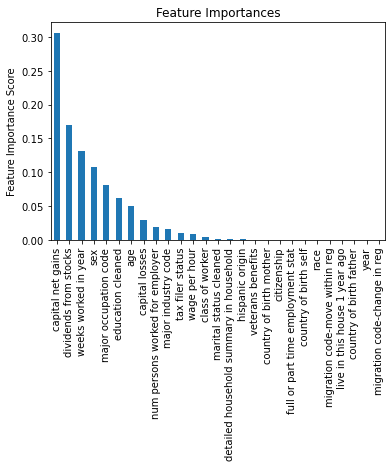

In [35]:
# I will go with gradient boosted classifier as my model as, although it wasn't the best performing I believe with hypertuning
# and reducing features it will perform better with the imbalanced target variable 

# start by extracting key features from our baseline model
feat_imp = pd.Series(gbt_model.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
# based on this can see only a few features have a significant impact on the model outcome so will set a limit on feature importance 
print(feat_imp)
key_features = []
varianceThreshold = 0.025
for i in feat_imp.items():
    if i[1] > varianceThreshold:
        key_features.append(i[0])
    else:
        pass
print(key_features)    

# filter for key features only
X_train = X_train[key_features]
X_test = X_test[key_features]

In [36]:
display(X_train)

,capital net gains,dividends from stocks,weeks worked in year,sex,major occupation code,education cleaned,age,capital losses
0,0,0,0,0,14,13,73,0
1,0,0,52,1,7,17,58,0
2,0,0,0,0,14,0,18,0
3,0,0,0,0,14,10,9,0
4,0,0,0,0,14,10,10,0
...,...,...,...,...,...,...,...,...
199517,6849,0,52,1,0,9,39,0
199518,0,0,0,1,14,11,87,0
199519,6418,9,52,1,2,11,65,0
199520,0,157,52,1,14,17,47,0


In [37]:
# with reduced data set I will tune our hyperparameters to find the best combination

# initialise model
gbt = GradientBoostingClassifier()

# define parameter grid
param_grid = {'n_estimators': [5, 50, 250],
              'max_depth': [2, 4, 6, 8],
              'learning_rate': [0.01, 0.1, 1, 10]
             }

# use cross-validation to iterate through the parameter combinations
cv = GridSearchCV(gbt, param_grid, cv=5, n_jobs=-1)

# fit to training set
cv.fit(X_train, y_train)

# print best parameters
print(cv.best_params_)
                


{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250}


In [38]:
# extract predictions from best model
cv_y_pred = cv.predict(X_test)

# print accuracy, precision and recall of SVM model
print("Accuracy: " + str(accuracy_score(y_test, cv_y_pred)))
print("Precision: " + str(precision_score(y_test, cv_y_pred)))
print("Recall: " + str(recall_score(y_test, cv_y_pred)))

# print AUC/ROC
print("AUC: " + str(roc_auc_score(y_test, cv_y_pred)))

# display confusion matrix
print(confusion_matrix(y_test, cv_y_pred))

Accuracy: 0.9554572553013185
Precision: 0.7441016333938294
Recall: 0.4231894030621022
AUC: 0.7068126630034216
[[87610   846]
 [ 3353  2460]]


# Model Evaluation & Potential Next Steps

In [ ]:
# Model performs well at correctly identifying individuals with <$50,000 income but poorly when it comes to >$50,000
# as can be seen with the confusion matrix and the recall score
# One potential cause for this could be due to an imbalanced target variable, 
# a solution could be to try training the model with a more balanced data set by reducing the amount of <$50,000 data points
# or through stratified sampling of the data to use a number of balanced subsets

# Another improvement to the model could be to consider external features to include:
            # A useful source of information could be economical data representative of the city/state each individual is from
            # this could provide more insight into whether the individual lives in a more affluent area which could indicate a 
            # higher wealth bracket
            
            # Another useful feature could be average income of each industry group listed, could serve as something of a benchmark

# I would want to explore some of these options before being happy with the solution presented as the amount of misidentified
# >$50,000 is currently too high